# Karan Kumar 6380812

## Hough Transform to count number of coins in an image

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

### Reading image

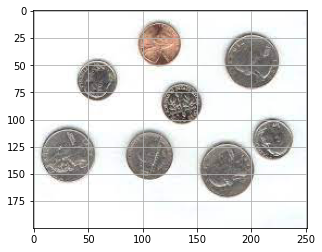

In [87]:
coins = plt.imread('assets/coin_sample1.jpeg')
coins2 = plt.imread('assets/coin_sample2.jpeg')
coins3 = plt.imread('assets/coin_sample3.jpeg')

plt.imshow(coins)
plt.grid()

### Grayscale and blur the image

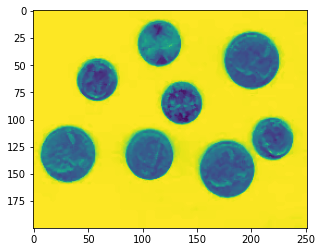

In [88]:
def grayscale_image(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def blur_image(image, blur_value):
    return cv2.medianBlur(image, blur_value)

sample_image_gray_blur = blur_image(grayscale_image(coins), 3)
plt.imshow(sample_image_gray_blur)

### Detect edeges using Canny edge detector

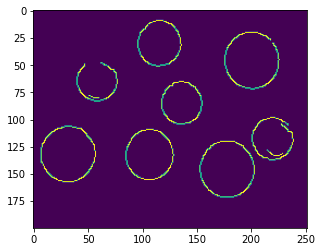

In [89]:
def edge_detect(image, min_val, max_val):
    return cv2.Canny(image, min_val, max_val)

sample_image_canny = edge_detect(sample_image_gray_blur, 250, 500)
plt.imshow(sample_image_canny)

### Using Hough Circle Transform with OpenCV

In [90]:
def hough_circle_opencv(coin_image_gb, dp, min_dist, param1, param2):
    circles = cv2.HoughCircles(coin_image_gb,cv2.HOUGH_GRADIENT,dp,min_dist, param1=param1,  # Gradient value passed to edge detection
        param2=param2)
    return circles

### Let's try it on our sample images

### Image 1:

In [91]:
sample_image_gray_blur = blur_image(grayscale_image(coins), 3)
sample_image_gray_blur_canny = edge_detect(sample_image_gray_blur, 250, 500)
circles_detected = hough_circle_opencv(sample_image_gray_blur_canny, 1, 40, 20, 30)


f"Number of coins detected: {np.size(circles_detected)/3}"

'Number of coins detected: 8.0'

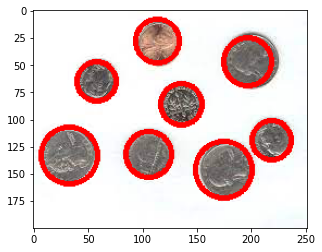

In [92]:
for (x,y,r) in np.round(circles_detected[0, :].astype("int")):
    cv2.circle(coins, (x,y), r, (255,0,0), 4)

plt.imshow(coins)

### Image 2:

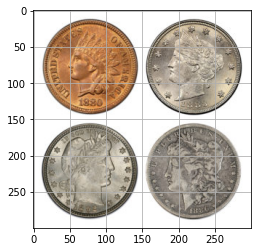

In [93]:
plt.imshow(coins2)
plt.grid()

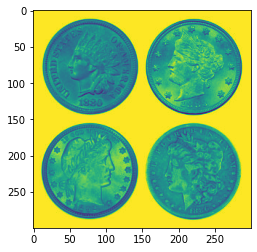

In [94]:
sample_image_gray_blur = blur_image(grayscale_image(coins2), 1)
plt.imshow(sample_image_gray_blur)

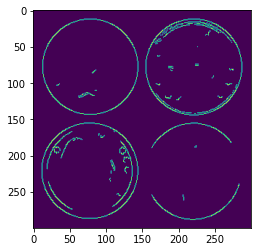

In [95]:
sample_image_gray_blur_canny2 = edge_detect(sample_image_gray_blur, 400, 600)
plt.imshow(sample_image_gray_blur_canny2)

In [96]:
circles_detected = hough_circle_opencv(sample_image_gray_blur_canny2, 1, 40, 20, 30)


f"Number of coins detected: {np.size(circles_detected)/3}"

'Number of coins detected: 4.0'

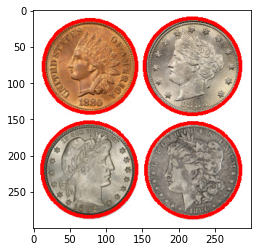

In [97]:
for (x,y,r) in np.round(circles_detected[0, :].astype("int")):
    cv2.circle(coins2, (x,y), r, (255,0,0), 4)

plt.imshow(coins2)

## Let's use our own Hough Circle Implementation

### Drawing circle function

(0.0, 40.0)

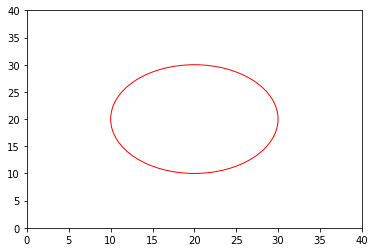

In [316]:
def draw_circle(cx, cy, r):
    Drawing_color_circle = plt.Circle((cx, cy), r, color='red', fill=False)
    axes = plt.gca()
    axes.add_artist(Drawing_color_circle)

draw_circle(20,20,10)
plt.xlim(0,40)
plt.ylim(0,40)

## Parametrize a circle

### Generate candidates for circle

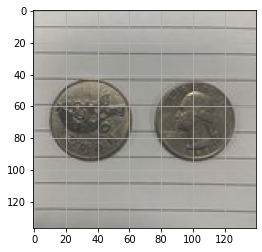

In [317]:
plt.imshow(coins3)
plt.grid()

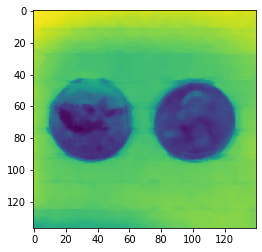

In [318]:
blurred = blur_image(grayscale_image(coins3), 5)
plt.imshow(blurred)

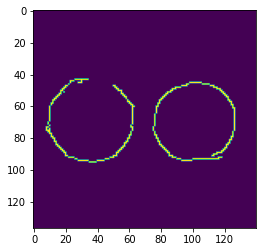

In [319]:
sample_image_canny2 = edge_detect(blurred, 70, 175)

plt.imshow(sample_image_canny2)

## Get the edges' coordinate

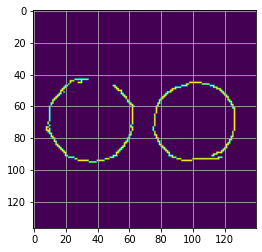

In [320]:
def get_edges(canny_img):
    indices = np.where(canny_img != 0)
    coordinates = zip(indices[1], indices[0])
    return list(coordinates)

plt.imshow(sample_image_canny2)
plt.grid()

In [321]:
coords = get_edges(sample_image_canny2)

coords[55]

(18, 49)

## Accumulate

In [322]:
height, width = sample_image_canny2.shape[:2]
height, width

(137, 140)

In [349]:
r_min = 20
r_max = 60
n_r = range(r_min, r_max+1)
#n_r = int(np.round(np.sqrt(height**2 + width**2)))

acc = np.zeros((height,width,(r_max-r_min)+1))

for r in range(r_min, r_max):
    for d in coords:
        x = d[0]
        y = d[1]
        for theta in range(0,361):
            a = int(x - r*np.cos(theta * (np.pi/180)))
            b = int(y - r*np.sin(theta * (np.pi/180)))
            if a+r < width and b+r< height:
                acc[b,a,r-r_min] += 1

## Find Peak

In [350]:
good_circles = []
max_votes = np.max(acc)
for y in range(height):
    for x in range(width):
        for r in range(r_min, r_max):
            if acc[y,x,r] >= 361:
                good_circles += [(x,y,r)]

good_circles

TypeError: 'range' object cannot be interpreted as an integer

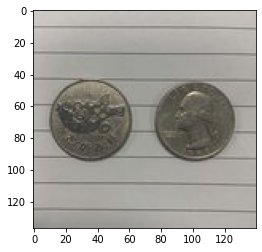

In [347]:
coins = plt.imread('assets/coin_sample3.jpeg')
plt.imshow(coins)
plt.gca()

for gc in good_circles:
    draw_circle(gc[0], gc[1], gc[2])